# Estadística y regresión lineal

In [1]:
import pandas as pd

In [2]:
dataset  = pd.read_csv("./data/01Salary_Data.csv")

In [3]:
dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,1].values

In [5]:
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [6]:
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

# Machine learning

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
regresion = LinearRegression()

In [9]:
regresion.fit(X, y) # esto hace el entrenamiento

LinearRegression()

In [10]:
regresion.predict([[1]]) # esto hace predicciones

array([35242.16252012])

In [11]:
regresion.coef_ # B1

array([9449.96232146])

In [12]:
regresion.intercept_ # B0

25792.20019866871

In [13]:
regresion.predict([[0]])

array([25792.20019867])

$$y = 9449X + 25792$$

$$y = 9449X + 25792$$

In [14]:
regresion.predict([[5]])

array([73042.01180594])

In [15]:
(9449 * 5) + 25792

73037

# Machine learning - Train/Test split

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [18]:
a, b = [1,2] # unpacking

In [19]:
a

1

In [20]:
b

2

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0) # default: 25% para test, y 75% para entrenamiento

In [22]:
regresion = LinearRegression()

In [23]:
regresion.fit(X_train, y_train) # esto entrena el modelo... con los datos de entrenamiento

LinearRegression()

In [24]:
regresion.predict(X_test)

array([ 41056.25705466, 123597.70938378,  65443.50433372,  63567.56223533,
       116093.94099022, 108590.17259667, 117031.91203942,  64505.53328452])

In [25]:
y_test

array([ 37731., 122391.,  57081.,  63218., 116969., 109431., 112635.,
        55794.])

In [26]:
(
    pd.DataFrame({
        "valores_equis" : [x[0] for x in X_test],
        "valores_estimados" : regresion.predict(X_test),
        "valores_observados": y_test
    })
    .assign(error = lambda x: x["valores_observados"] - x["valores_estimados"])
)

,valores_equis,valores_estimados,valores_observados,error
0,1.5,41056.257055,37731.0,-3325.257055
1,10.3,123597.709384,122391.0,-1206.709384
2,4.1,65443.504334,57081.0,-8362.504334
3,3.9,63567.562235,63218.0,-349.562235
4,9.5,116093.940990,116969.0,875.059010
5,8.7,108590.172597,109431.0,840.827403
6,9.6,117031.912039,112635.0,-4396.912039
7,4.0,64505.533285,55794.0,-8711.533285


In [27]:
import matplotlib.pyplot as plt

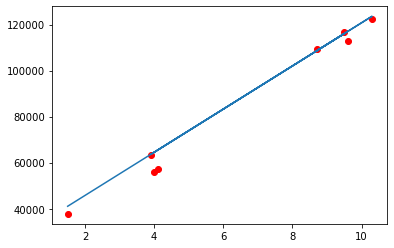

In [28]:
plt.scatter(X_test,y_test, color="r")
plt.plot(X_test, regresion.predict(X_test))

In [29]:
regresion.score(X_test, y_test)

0.9779208335417602

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0) # partimos nuestros datos

regresion = LinearRegression() # instanciamos nuestro modelo

regresion.fit(X_train, y_train) # entrenamos nuestro modelo, con datos de entrenamiento

regresion.score(X_test, y_test) # evaluamos el rendimiento de nuestro modelo con datos de test

0.9779208335417602

In [31]:
import statsmodels.api as sm

In [32]:
model = sm.OLS(y_train, X_train)

In [33]:
results = model.fit()

In [34]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.968
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                              645.4
Date:                Tue, 26 Apr 2022   Prob (F-statistic):                    2.99e-17
Time:                        08:48:21   Log-Likelihood:                         -240.68
No. Observations:                  22   AIC:                                      483.4
Df Residuals:                      21   BIC:                                      484.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          1.375e+04    541.129     25.405      0.000    1.26e+04    1.49e+04
==============================================================================
Omnibus:                        0.583   Durbin-Watson:                   2.573
Prob(Omnibus):                  0.747   Jarque-Bera (JB):                0.368
Skew:                          -0.301   Prob(JB):                        0.832
Kurtosis:                       2.800   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Valores perdidos

In [35]:
# Promedio
[1,2,3,4,5]


[1, 2, 3, 4, 5]

In [36]:
sum([1,2,3,4,5])

15

In [37]:
len([1,2,3,4,5])

5

In [38]:
15 / 5

3.0

In [39]:
import numpy as np

In [40]:
np.nan

nan

In [41]:
numeros = [1,2,3,4,np.nan]

In [42]:
sum(numeros)

nan

In [43]:
pd.Series(numeros).sum() / len(numeros)

2.0

In [44]:
pd.Series(numeros).mean()

2.5

In [45]:
(1+2+3+4) / 4

2.5

In [46]:
(1+2+3+4) / 5

2.0

In [47]:
def compara_medias(vector):
    if not type(vector)=="pandas.core.series.Series":
        vector = pd.Series(vector)
    print("promedio pandas: ", vector.mean())
    print("promedio manual: ", vector.sum()/len(vector))

In [48]:
compara_medias(numeros)

promedio pandas:  2.5
promedio manual:  2.0


In [49]:
compara_medias([1,2,3,np.nan])

promedio pandas:  2.0
promedio manual:  1.5


In [50]:
import random

In [51]:
def creaDataFrame_na(n):
    
    consecutivos = range(n)
    aleatorios = [random.randint(1,10) for x in range(n)]
    aleatorios = [np.nan if random.random()>0.95 else x for x in aleatorios ]

    data = pd.DataFrame({
        "consecutivos" : consecutivos,
        "aleatorios"   : aleatorios
    })
    
    return data


In [52]:
datos = creaDataFrame_na(10000)

In [53]:
compara_medias(datos["aleatorios"])

promedio pandas:  5.519198312236287
promedio manual:  5.2322


# Actividad:

* Identifica las filas que tienen valor perdido
* Genera el subconjunto de valores perdidos, y genera el subconjunto de información completa
* Verifica que el data frame que tiene información completa nos da el mismo promedio con pandas que manualmente.


In [54]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   consecutivos  10000 non-null  int64  
 1   aleatorios    9480 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 156.4 KB


In [55]:
10000 - 9458

542

In [56]:
filtro = datos["aleatorios"].apply(np.isnan)

In [57]:
datos_na = datos[filtro]

In [58]:
datos = datos.dropna(how="any")

In [59]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9480 entries, 0 to 9998
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   consecutivos  9480 non-null   int64  
 1   aleatorios    9480 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 222.2 KB


In [60]:
compara_medias(datos["aleatorios"])

promedio pandas:  5.519198312236287
promedio manual:  5.519198312236287


In [61]:
pd.Series([1,2,3,4,200]).mean()

42.0

# Atípicos

El promedio es sensible a datos atípicos

<AxesSubplot:ylabel='Frequency'>

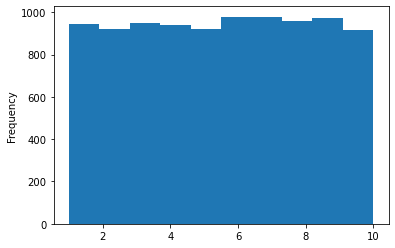

In [62]:
datos["aleatorios"].plot.hist()

In [63]:
def creaDataFrame_normal(n):
    
    consecutivos = range(n)
    aleatorios = [np.random.normal() for x in range(n)]
#     aleatorios = [np.nan if random.random()>0.95 else x for x in aleatorios ]

    data = pd.DataFrame({
        "consecutivos" : consecutivos,
        "aleatorios"   : aleatorios
    })
    
    return data


In [64]:
datos = creaDataFrame_normal(10000)

In [65]:
def histograma(serie):
    
    print(serie.describe())
    
    mediana = serie.median()
    media   = serie.mean()
    
    valor_maximo = max(np.histogram(serie, bins=100)[0])
    
    serie.plot.hist(bins=100, alpha=0.5)
    plt.vlines(mediana, 0, valor_maximo, colors="g")
    plt.vlines(media, 0, valor_maximo, colors="r")
    plt.show()

count    10000.000000
mean         0.000969
std          1.018434
min         -3.620797
25%         -0.685168
50%         -0.007331
75%          0.695722
max          3.922002
Name: aleatorios, dtype: float64


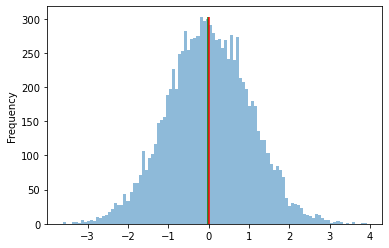

In [66]:
histograma(datos["aleatorios"])

In [67]:
datos["aleatorios"] = [random.randrange(10,15) if random.random()>0.95 else x for x in datos["aleatorios"]]

count    10000.000000
mean         0.573205
std          2.764239
min         -3.620797
25%         -0.642594
50%          0.052652
75%          0.815855
max         14.000000
Name: aleatorios, dtype: float64


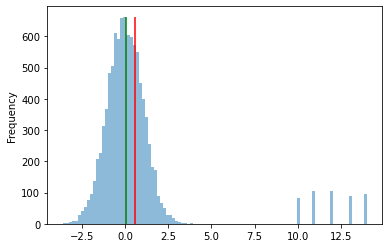

In [68]:
histograma(datos["aleatorios"])

<AxesSubplot:>

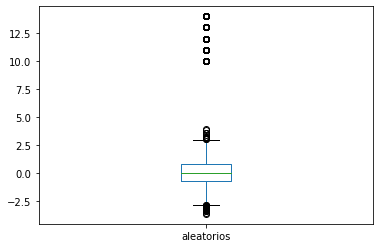

In [69]:
datos["aleatorios"].plot.box()